# Neste notebook, vamos usar outra técnica de redução de dimensionalidade em aprendizado de máquina:
# **Análise de Discriminantes Lineares**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import os
import torch
import torch.nn as nn

In [2]:
from sklearn.datasets import load_iris

iris_data = load_iris(as_frame=True)
iris_data = iris_data.frame


In [3]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [4]:
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


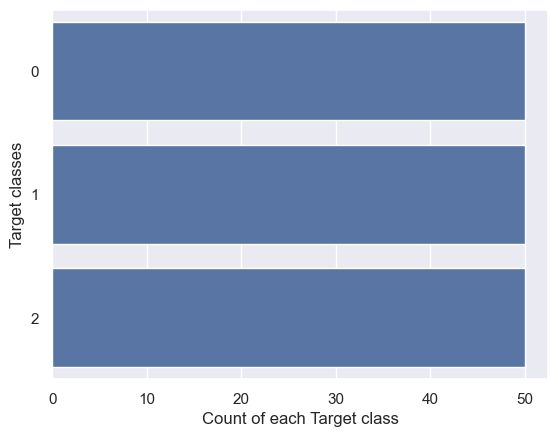

In [6]:
sns.countplot(y=iris_data.target,data=iris_data)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

#### Sobre o conjunto de dados :
1. 150 linhas
2. 4 características
3. Todas tem as mesmas unidades de medida (cm)
4. Não há dados faltantes
5. Há 3 classes: 'Iris-setosa', 'Iris-versicolor' e 'Iris-virginica'
6. Não há desbalanceamento, todas as classes tme o mesmo número de linhas (50 cada).

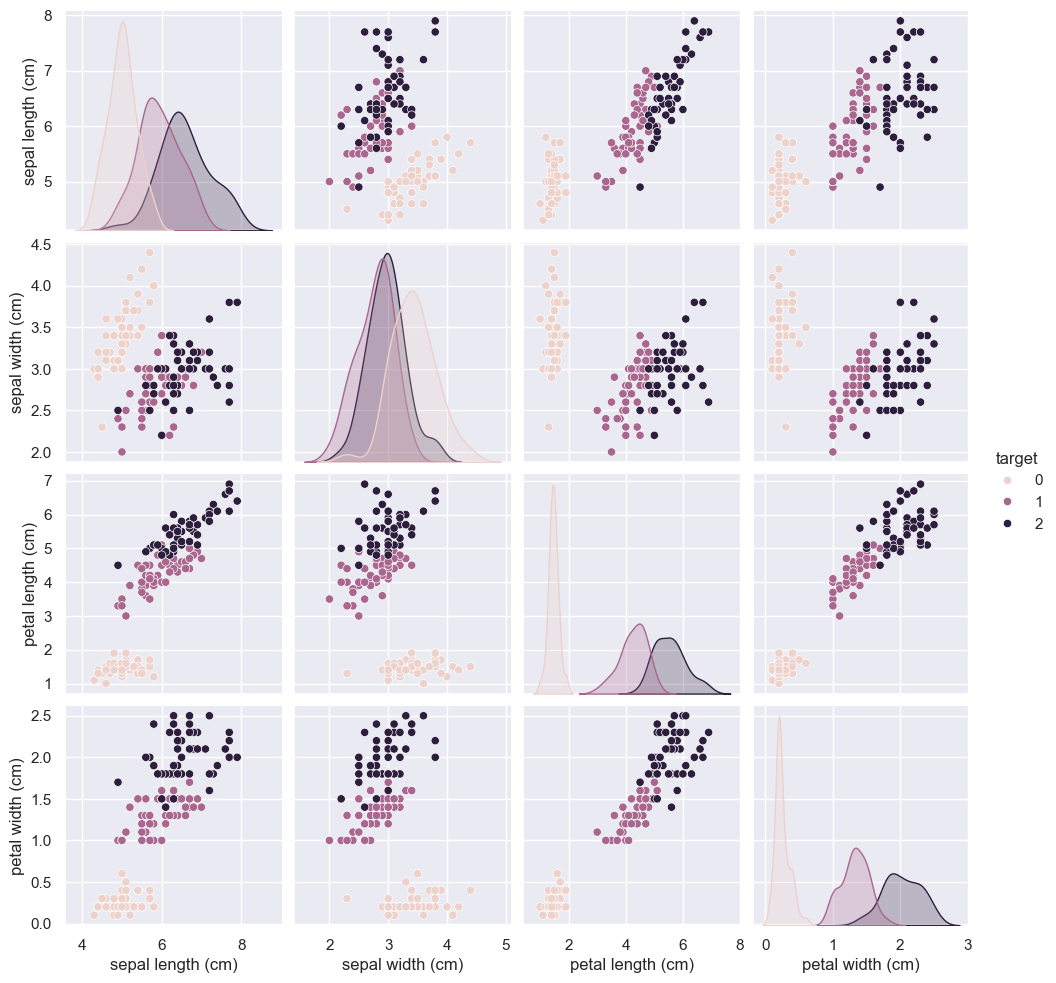

In [7]:
p=sns.pairplot(iris_data, hue = 'target')

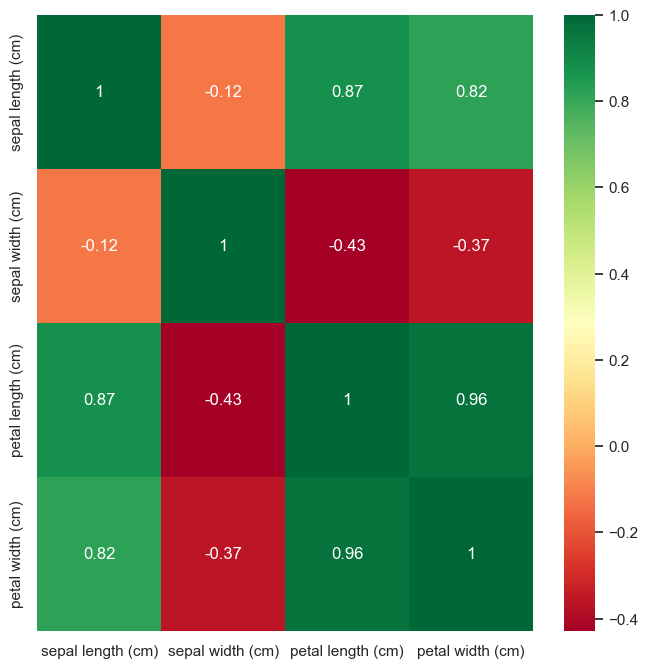

In [8]:
plt.figure(figsize=(8,8))
p=sns.heatmap(iris_data.iloc[:,0:4].corr(), annot=True,cmap='RdYlGn')

### Um dos objetivos da Análise Exploratória dos Dados (EDA) é identificar características que não são muito úteis para explicar o resultado desejado. O recurso sepal width (cm) parece ser menos relevante para explicar a classe alvo em comparação com outros recursos


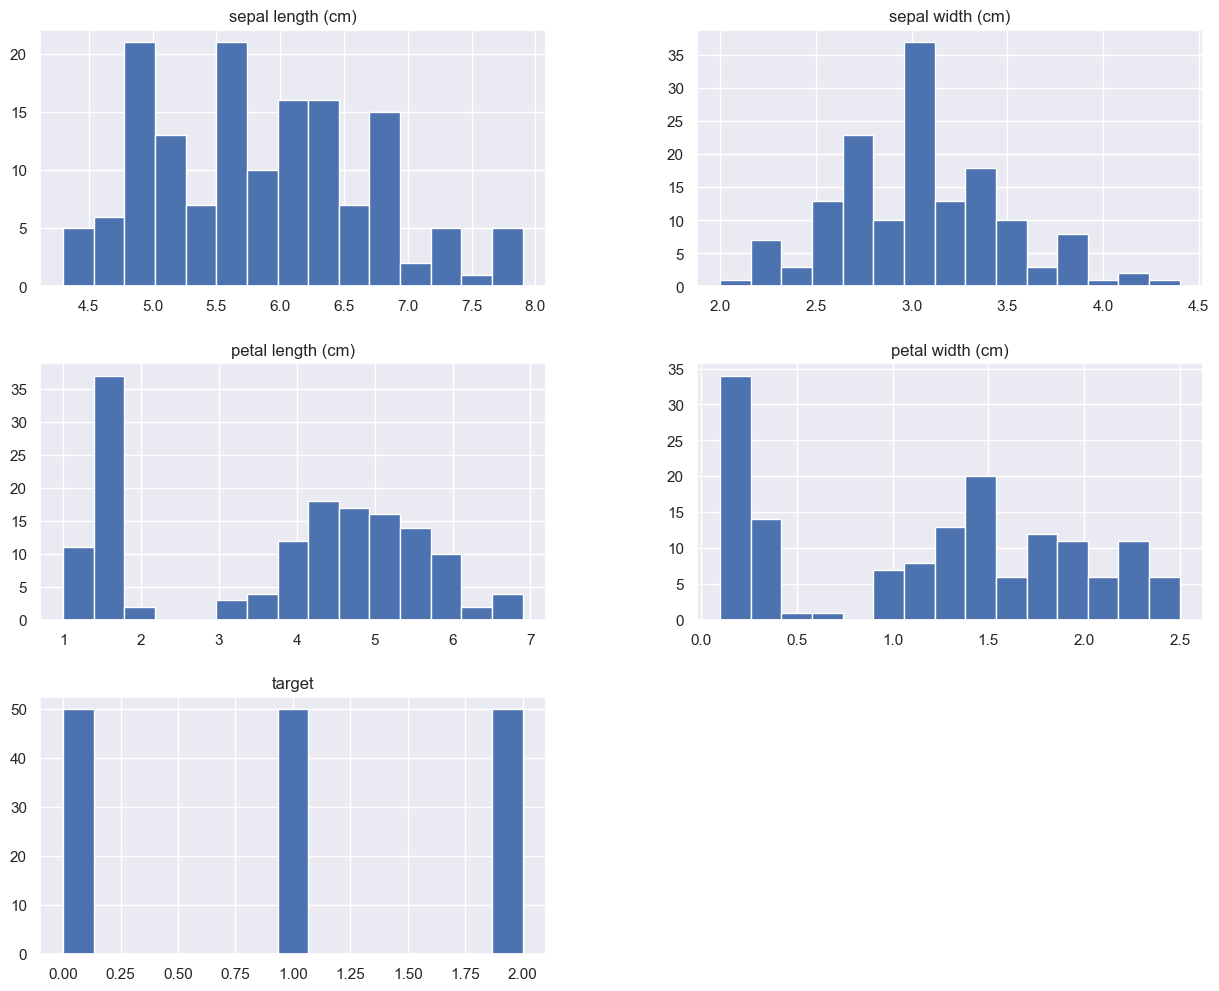

In [9]:
iris_data.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

#### As distribuições dos histogramas não parecem ideais.

# Preparação dos dados - SEM LDA

In [10]:
dados = torch.tensor(iris_data.values, dtype=torch.float32) # Convert DataFrame to NumPy array using .values
X=dados[:,0:4]
d=dados[:,4]

dados_treino, dados_teste, d_treino, d_teste = train_test_split(X, d, test_size=0.30, random_state=42)

train_set = [
    (dados_treino[i,:], d_treino[i])
    for i in range(dados_treino.shape[0])
]

test_set = [
    (dados_teste[i,:], d_teste[i])
    for i in range(dados_teste.shape[0])
]



# Preparação dos dados - com LDA

lb
 tensor([3.2210e+01, 2.8812e-01, 7.0373e-06, 1.7987e-06])
W_K
 tensor([[-0.2076,  0.0037],
        [-0.3874, -0.5925],
        [ 0.5535,  0.2463],
        [ 0.7074, -0.7670]])


<Figure size 640x480 with 0 Axes>

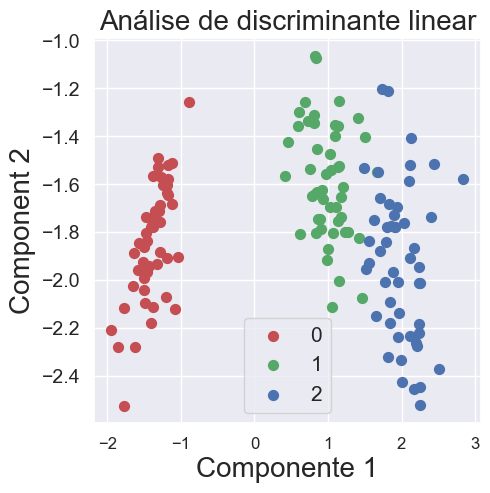

In [11]:
# Média de cada classe
X0_mean = torch.mean(X[0:49,:], axis=0)
X1_mean = torch.mean(X[50:99,:], axis=0)
X2_mean = torch.mean(X[100:150,:], axis=0)

S0 = (X[0:49, :] - X0_mean).T @ (X[0:49, :] - X0_mean)
S1 = (X[50:99, :] - X1_mean).T @ (X[50:99, :] - X1_mean)
S2 = (X[100:150, :] - X2_mean).T @ (X[100:150, :] - X2_mean)

Sw = S0 + S1 + S2

X_mean = torch.mean(X,axis=0)

N0 = 50
N1 = 50
N2 = 50
Sb = N0*(X0_mean-X_mean).reshape(-1, 1) @ (X0_mean-X_mean).reshape(-1, 1).T + N1*(X1_mean-X_mean).reshape(-1, 1) @ (X1_mean-X_mean).reshape(-1, 1).T + N2*(X2_mean-X_mean).reshape(-1, 1) @ (X2_mean-X_mean).reshape(-1, 1).T

S = torch.linalg.solve(Sw, Sb)

# Autovalores e Autovetores
lb, w = torch.linalg.eig(S)
lb = lb.real
w = w.real
print("lb\n", lb)

# Vamos considerara K-1 = 2 autovetores
K = 3
K_1 = K-1
W_K = w[:,0].reshape(-1, 1)
if K_1 > 1:
  for i in range(1, K_1):
    W_K = torch.cat([W_K, w[:,i].reshape(-1, 1)], dim=1)

print("W_K\n", W_K)

# Aplicando a transformação nos dados para gerar as features
P = X @ W_K

if K_1 == 1:
    P = P.reshape(-1, 1)


dados_treino_lda, dados_teste_lda, d_treino_lda, d_teste_lda = train_test_split(P, d, test_size=0.30, random_state=42)

train_set_lda = [
    (dados_treino_lda[i,0:K_1], d_treino_lda[i])
    for i in range(dados_treino_lda.shape[0])
]

test_set_lda = [
    (dados_teste_lda[i,0:K_1], d_teste_lda[i])
    for i in range(dados_teste_lda.shape[0])
]

P_df = pd.DataFrame(P.numpy())
P_df['target'] = d.numpy()

if K_1>1:
  plt.figure()
  plt.figure(figsize=(5,5))
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=14)
  plt.xlabel('Componente 1',fontsize=20)
  plt.ylabel('Component 2',fontsize=20)
  plt.title("Análise de discriminante linear",fontsize=20)
  targets = ['0', '1', '2']
  colors = ['r', 'g', 'b']
  for target, color in zip(targets, colors):
      indices = P_df['target'] == int(target)
      plt.scatter(P_df.loc[indices, 0], P_df.loc[indices, 1], c = color, s = 50)

  plt.legend(targets,prop={'size': 15})



# Dados gerais do modelo


In [12]:
# Ajuste de hiperparâmetros

# passo de adaptação da rede MLP
eta = 0.001

# Tamanho do mini-batch
Nb = 16

# Número de épocas
Ne = 1000


# Modelo sem LDA


In [13]:
class Model(nn.Module):

    # Geralmente, os blocos da rede são definidos no método __init__()
    def __init__(self):
        # Necessário chamar __init__() da classe mãe
        super().__init__()

        # Uma das formas de se definir um modelo é a sequencial
        self.model = nn.Sequential(
            # Entrada com 4 elementos, conectada a 16 neurônios
            nn.Linear(4, 16),
            # Função de ativação ReLU
            nn.ReLU(),

            # Saídas de 16 neurônios conectadas a 8 neurônios
            nn.Linear(16, 8),
            nn.Dropout(0.2),
            nn.ReLU(),

            # Saídas de 8 neurônios conectadas a 3 neurônios
            nn.Linear(8, 3),

        )

    # O método forward() define como é feito o cálculo progressivo
    # para obter a saída da rede, a partir da entrada x.
    # Nesse caso, como foi definido um modelo sequencial em
    # self.model, basta chamar self.model(x)
    def forward(self, x):
        output = self.model(x)
        return output

# Modelo com LDA

In [14]:
class Model_lda(nn.Module):

    # Geralmente, os blocos da rede são definidos no método __init__()
    def __init__(self, K_1):
        # Necessário chamar __init__() da classe mãe
        super().__init__()
        self.K_1 = K_1

        # Uma das formas de se definir um modelo é a sequencial
        self.model = nn.Sequential(
            # Entrada com K_1 elementos, conectada a 16 neurônios
            nn.Linear(K_1, 16),
            # Função de ativação ReLU
            nn.ReLU(),

            # Saídas de 16 neurônios conectadas a 8 neurônios
            nn.Linear(16, 8),
            nn.Dropout(0.2),
            nn.ReLU(),

            # Saídas de 8 neurônios conectadas a 3 neurônios
            nn.Linear(8, 3),

        )

    # O método forward() define como é feito o cálculo progressivo
    # para obter a saída da rede, a partir da entrada x.
    # Nesse caso, como foi definido um modelo sequencial em
    # self.model, basta chamar self.model(x)
    def forward(self, x):
        output = self.model(x)
        return output

# Modelo mais simples com LDA

In [15]:
class Model_lda2(nn.Module):

    # Geralmente, os blocos da rede são definidos no método __init__()
    def __init__(self, K_1):
        # Necessário chamar __init__() da classe mãe
        super().__init__()
        self.K_1 = K_1

        # Uma das formas de se definir um modelo é a sequencial
        self.model = nn.Sequential(
            # Entrada com K_1 elementos, conectada a 3 neurônios
            nn.Linear(K_1, 3),
            # Função de ativação ReLU
            nn.ReLU(),

            # Saídas de 3 neurônio conectadas a 3 neurônios
            nn.Linear(3, 3),

        )

    # O método forward() define como é feito o cálculo progressivo
    # para obter a saída da rede, a partir da entrada x.
    # Nesse caso, como foi definido um modelo sequencial em
    # self.model, basta chamar self.model(x)
    def forward(self, x):
        output = self.model(x)
        return output

In [16]:
device = torch.device("cpu")
model = Model().to(device=device)
model_lda = Model_lda(K_1).to(device=device)
model_lda2 = Model_lda2(K_1).to(device=device)

def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Linear') != -1:
        torch.nn.init.kaiming_normal_(m.weight)
        torch.nn.init.zeros_(m.bias)

model.apply(weights_init)
model_lda.apply(weights_init)
model_lda2.apply(weights_init)


loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = eta)
optimizer_lda = torch.optim.Adam(model_lda.parameters(), lr = eta)
optimizer_lda2 = torch.optim.Adam(model_lda2.parameters(), lr = eta)

# Função para avaliar o modelo

In [17]:
def evaluate(model, test_loader):
    model.eval()
    correto = 0
    total = 0
    with torch.no_grad():  # Não calcular os gradientes durante a avaliação
        for X, d in test_loader:
            y = model(X)
            _, predito = torch.max(y, 1)
            total += d.size(0)
            correto += (predito == d).sum().item()

    print(f"Acurácia no conjunto de teste: {100 * correto/total:.2f}%")

# Treinamento e avaliação dos modelos

Treinamento do modelo sem LDA

Época: 0 Loss: 5.586380958557129 Acurácia: 8.33%
Época: 10 Loss: 1.9998923540115356 Acurácia: 27.08%
Época: 20 Loss: 1.157792568206787 Acurácia: 62.50%
Época: 30 Loss: 0.652603268623352 Acurácia: 67.71%
Época: 40 Loss: 0.6441835165023804 Acurácia: 67.71%
Época: 50 Loss: 0.49802303314208984 Acurácia: 68.75%
Época: 60 Loss: 0.27117758989334106 Acurácia: 79.17%
Época: 70 Loss: 0.3403550386428833 Acurácia: 77.08%
Época: 80 Loss: 0.4210011959075928 Acurácia: 78.12%
Época: 90 Loss: 0.45657455921173096 Acurácia: 79.17%
Época: 100 Loss: 0.558640718460083 Acurácia: 83.33%
Época: 110 Loss: 0.36909589171409607 Acurácia: 79.17%
Época: 120 Loss: 0.369011253118515 Acurácia: 85.42%
Época: 130 Loss: 0.3526076674461365 Acurácia: 84.38%
Época: 140 Loss: 0.37274566292762756 Acurácia: 85.42%
Época: 150 Loss: 0.24869553744792938 Acurácia: 83.33%
Época: 160 Loss: 0.30331316590309143 Acurácia: 85.42%
Época: 170 Loss: 0.41591569781303406 Acurácia: 87.50%
Época: 180 Loss: 0.27063608169555664 Acurácia: 82.29%
É

Text(0, 0.5, 'Loss')

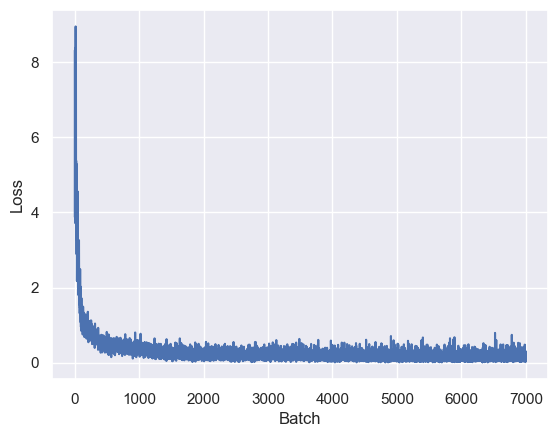

In [18]:
# Carregando os dados de treinamento
train_loader = torch.utils.data.DataLoader(train_set, batch_size=Nb, shuffle=True)

# Lista usada para guardar o valor da função custo ao longo das iterações
losses = []

# Loop das épocas
for epoch in range(Ne):
    correto = 0
    total = 0
    # Loop dos mini batches - note que é usado o DataLoader para obter
    # os sinais de entrada e desejado, X e d
    for n, (X, d) in enumerate(train_loader):
        #from IPython import embed; embed()
        # Envia os dados para a GPU, caso ela exista
        X = X.to(device=device)
        d = d.type(torch.LongTensor).to(device=device)

        # Coloca o modelo em modo treinamento. Isso não é necessário nesse
        # caso, pois não estamos fazendo validação. Mas é interessante manter
        # a linha para lembrar desse detalhe
        model.train()

        # Zera informações de gradientes: por padrão o PyTorch acumula os
        # gradientes a cada chamada de loss.backward(). Na maioria dos casos,
        # estamos interessados apenas no último valor dos gradientes
        model.zero_grad()

        # Calcula a saída
        y = model(X)

        # Calcula o valor da função custo
        loss = loss_function(y, d)

        # Calcula os gradientes
        loss.backward()

        # Atualiza os pesos do modelo, de acordo com as regras
        # do otimizador escolhido
        optimizer.step()

        # Armazena o valor da função custo
        losses.append(loss.item())

        # Calcula a acurácia
        _, predito = torch.max(y, 1)
        total += d.size(0)
        correto += (predito == d).sum().item()

        # Mostra o valor da função custo a cada 500 épocas
        if epoch % 10 == 0 and n == dados_treino.shape[0]//Nb - 1:
            print(f"Época: {epoch} Loss: {loss} Acurácia: {100 * correto/total:.2f}%")
#

plt.figure()
plt.plot(losses)
plt.xlabel("Batch")
plt.ylabel("Loss")



Avaliação do Modelo sem LDA

In [19]:
test_loader = torch.utils.data.DataLoader(test_set, batch_size=Nb, shuffle=False)
evaluate(model, test_loader)

Acurácia no conjunto de teste: 100.00%


Treinamento do Modelo com LDA

Época: 0 Loss: 1.972493052482605 Acurácia: 32.29%
Época: 10 Loss: 0.6950663328170776 Acurácia: 61.46%
Época: 20 Loss: 0.5808801054954529 Acurácia: 67.71%
Época: 30 Loss: 0.6754701137542725 Acurácia: 75.00%
Época: 40 Loss: 0.4367133677005768 Acurácia: 78.12%
Época: 50 Loss: 0.4319270849227905 Acurácia: 84.38%
Época: 60 Loss: 0.41798174381256104 Acurácia: 83.33%
Época: 70 Loss: 0.31587809324264526 Acurácia: 90.62%
Época: 80 Loss: 0.5304149389266968 Acurácia: 86.46%
Época: 90 Loss: 0.5015765428543091 Acurácia: 89.58%
Época: 100 Loss: 0.18020623922348022 Acurácia: 91.67%
Época: 110 Loss: 0.36734530329704285 Acurácia: 91.67%
Época: 120 Loss: 0.30462953448295593 Acurácia: 92.71%
Época: 130 Loss: 0.3092745542526245 Acurácia: 91.67%
Época: 140 Loss: 0.34549206495285034 Acurácia: 93.75%
Época: 150 Loss: 0.26103675365448 Acurácia: 93.75%
Época: 160 Loss: 0.47321614623069763 Acurácia: 93.75%
Época: 170 Loss: 0.08302369713783264 Acurácia: 95.83%
Época: 180 Loss: 0.40923887491226196 Acurácia: 89.58

Text(0, 0.5, 'Loss_lda')

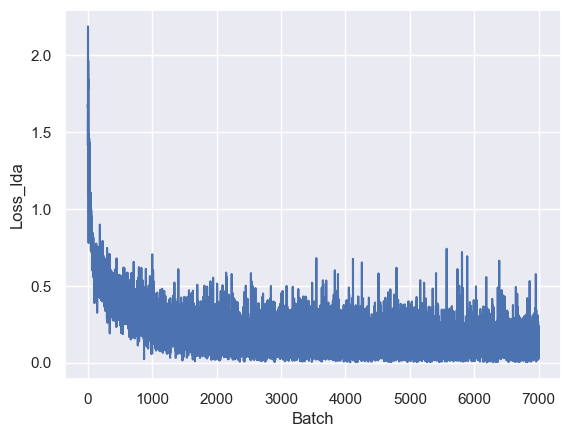

In [20]:
# Carregando os dados de treinamento
train_loader_lda = torch.utils.data.DataLoader(train_set_lda, batch_size=Nb, shuffle=True)

# Lista usada para guardar o valor da função custo ao longo das iterações
losses_lda = []

# Loop das épocas
for epoch in range(Ne):
    correto = 0
    total = 0
    # Loop dos mini batches - note que é usado o DataLoader para obter
    # os sinais de entrada e desejado, X e d
    for n, (X, d) in enumerate(train_loader_lda):
        #from IPython import embed; embed()
        # Envia os dados para a GPU, caso ela exista
        X = X.to(device=device)
        d = d.type(torch.LongTensor).to(device=device)

        # Coloca o modelo em modo treinamento. Isso não é necessário nesse
        # caso, pois não estamos fazendo validação. Mas é interessante manter
        # a linha para lembrar desse detalhe
        model_lda.train()

        # Zera informações de gradientes: por padrão o PyTorch acumula os
        # gradientes a cada chamada de loss.backward(). Na maioria dos casos,
        # estamos interessados apenas no último valor dos gradientes
        model_lda.zero_grad()

        # Calcula a saída
        y = model_lda(X)

        # Calcula o valor da função custo
        loss = loss_function(y, d)

        # Calcula os gradientes
        loss.backward()

        # Atualiza os pesos do modelo, de acordo com as regras
        # do otimizador escolhido
        optimizer_lda.step()

        # Armazena o valor da função custo
        losses_lda.append(loss.item())

        # Calcula a acurácia
        _, predito = torch.max(y, 1)
        total += d.size(0)
        correto += (predito == d).sum().item()

        # Mostra o valor da função custo a cada 500 épocas
        if epoch % 10 == 0 and n == dados_treino.shape[0]//Nb - 1:
            print(f"Época: {epoch} Loss: {loss} Acurácia: {100 * correto/total:.2f}%")


plt.figure()
plt.plot(losses_lda)
plt.xlabel("Batch")
plt.ylabel("Loss_lda")

Avaliação do Modelo com LDA

In [21]:
test_loader_lda = torch.utils.data.DataLoader(test_set_lda, batch_size=Nb, shuffle=False)
evaluate(model_lda, test_loader_lda)

Acurácia no conjunto de teste: 100.00%


Treinamento do Modelo mais simples com LDA

Época: 0 Loss: 1.6371134519577026 Acurácia: 39.58%
Época: 10 Loss: 1.7002246379852295 Acurácia: 64.58%
Época: 20 Loss: 1.7766947746276855 Acurácia: 65.62%
Época: 30 Loss: 1.192416787147522 Acurácia: 65.62%
Época: 40 Loss: 0.9182335138320923 Acurácia: 64.58%
Época: 50 Loss: 0.7902204990386963 Acurácia: 64.58%
Época: 60 Loss: 0.966507613658905 Acurácia: 62.50%
Época: 70 Loss: 0.5878413319587708 Acurácia: 65.62%
Época: 80 Loss: 0.6124958992004395 Acurácia: 69.79%
Época: 90 Loss: 0.5934843420982361 Acurácia: 70.83%
Época: 100 Loss: 0.7039170861244202 Acurácia: 72.92%
Época: 110 Loss: 0.5721953511238098 Acurácia: 71.88%
Época: 120 Loss: 0.5229846239089966 Acurácia: 77.08%
Época: 130 Loss: 0.6022224426269531 Acurácia: 77.08%
Época: 140 Loss: 0.4280391037464142 Acurácia: 78.12%
Época: 150 Loss: 0.4702017903327942 Acurácia: 83.33%
Época: 160 Loss: 0.4492536783218384 Acurácia: 86.46%
Época: 170 Loss: 0.4143766760826111 Acurácia: 86.46%
Época: 180 Loss: 0.4340684115886688 Acurácia: 86.46%
Época:

Text(0, 0.5, 'Loss_lda + simples')

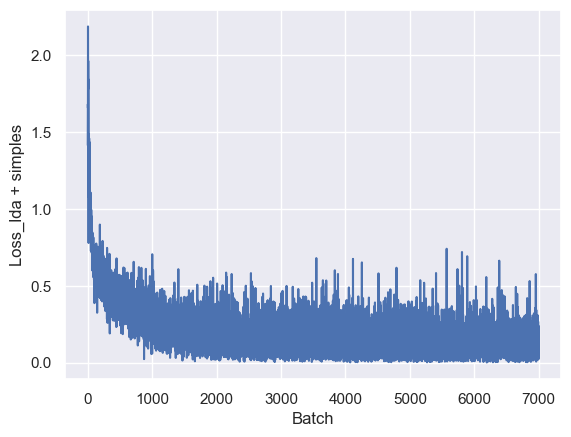

In [22]:
# Carregando os dados de treinamento
train_loader_lda2 = torch.utils.data.DataLoader(train_set_lda, batch_size=Nb, shuffle=True)

# Lista usada para guardar o valor da função custo ao longo das iterações
losses_lda2 = []

# Loop das épocas
for epoch in range(Ne):
    correto = 0
    total = 0
    # Loop dos mini batches - note que é usado o DataLoader para obter
    # os sinais de entrada e desejado, X e d
    for n, (X, d) in enumerate(train_loader_lda2):
        #from IPython import embed; embed()
        # Envia os dados para a GPU, caso ela exista
        X = X.to(device=device)
        d = d.type(torch.LongTensor).to(device=device)

        # Coloca o modelo em modo treinamento. Isso não é necessário nesse
        # caso, pois não estamos fazendo validação. Mas é interessante manter
        # a linha para lembrar desse detalhe
        model_lda2.train()

        # Zera informações de gradientes: por padrão o PyTorch acumula os
        # gradientes a cada chamada de loss.backward(). Na maioria dos casos,
        # estamos interessados apenas no último valor dos gradientes
        model_lda2.zero_grad()

        # Calcula a saída
        y = model_lda2(X)

        # Calcula o valor da função custo
        loss = loss_function(y, d)

        # Calcula os gradientes
        loss.backward()

        # Atualiza os pesos do modelo, de acordo com as regras
        # do otimizador escolhido
        optimizer_lda2.step()

        # Armazena o valor da função custo
        losses_lda2.append(loss.item())

        # Calcula a acurácia
        _, predito = torch.max(y, 1)
        total += d.size(0)
        correto += (predito == d).sum().item()

        # Mostra o valor da função custo a cada 500 épocas
        if epoch % 10 == 0 and n == dados_treino.shape[0]//Nb - 1:
            print(f"Época: {epoch} Loss: {loss} Acurácia: {100 * correto/total:.2f}%")


plt.figure()
plt.plot(losses_lda)
plt.xlabel("Batch")
plt.ylabel("Loss_lda + simples")

Avaliação do Modelo mais simples com LDA

In [23]:
test_loader_lda2 = torch.utils.data.DataLoader(test_set_lda, batch_size=Nb, shuffle=False)
evaluate(model_lda2, test_loader_lda2)

Acurácia no conjunto de teste: 97.78%


In [24]:
lbb, wb = torch.linalg.eig(Sb)
lbb = lb.real
wb = wb.real
print("lb\n", lb)
r=torch.linalg.matrix_rank(Sb)
print("r\n", r)

lb
 tensor([3.2210e+01, 2.8812e-01, 7.0373e-06, 1.7987e-06])
r
 tensor(2)
